# Практикум к курсу "Стохастический анализ и моделирование"

 <font color=#7A378B> _Выполнила студентка 4 курса Сафонова Елизавета_</font>

- [x] Задание №1
- [x] Задание №2
- [x] Задание №3
- [x] Задание №4
- [x] Задание №5
- [x] Задание №6

## Задание № 1

1. Реализовать генератор схемы Бернулли с заданной вероятностью успеха $p$. На основе генератора схемы Бернулли построить датчик для биномиального распределения.
2. Реализовать генератор геометрического распределения. Проверить для данного распределения свойство отсутствия памяти.
3. Рассмотреть игру в орлянку $~-$ бесконечную последовательность независимых испытаний с бросанием правильной монеты. Выигрыш $S_n$ определяется как сумма по всем $n$ испытаниям значений $1$ и $-1$ в зависимости от выпавшей стороны. Проиллюстрировать (в виде ломаной) поведение нормированной суммы $Y(i) = \frac{S_i}{\sqrt{n}}$, как функцию от номера испытания $i = 1 \dots n$ для одной отдельно взятой траектории. Дать теоретическую оценку для $Y(n)$ при $n \rightarrow \infty$

   <font color=#7A378B> 1. __Схема Бернулли__ $-$ модель, состоящая из последовательности $n$ случайных величин $\xi_1, \xi_2, \dots, \xi_n$, принимающих значения $0$ и $1$ и таких, что: случайные величины $\xi_i$ независимы и одинаково распределены (на метаязыке: отсутствие взаимного влияния и воспроизводимость, соответственно). </font>
   
 <font color=#7A378B>  $$\begin{equation*}
\xi_i = 
 \begin{cases}
   1, &\text{в $i$-ом испытании успех}\\
   0, &\text{иначе}
 \end{cases}
\end{equation*}$$</font>

<font color=#7A378B> __Биномиальное распределение__ – это распределение числа появления события, имеющего вероятность $p$ в $n$ независимых испытаниях (т.е. распределение количества успехов в схеме Бернулли). </font>

In [17]:
import numpy as np
from tqdm import tqdm
from random import random
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib 

In [18]:
def bernoulli(p, n):
    x = (np.random.uniform(size = n) <= p) * 1
    return x

In [19]:
def binomial(p, k, n):
    matrix_bern = bernoulli(p, k * n).reshape(n, k)
    res = np.sum(matrix_bern, axis = 1)
    return res

In [20]:
# Значения параметров
n = 500
p = 0.7
k = 30

In [21]:
check_bernoulli = np.random.binomial(1, p, n)
my_bernoulli = bernoulli(p, n)
values_bernoulli, counts_bernoulli = np.unique(check_bernoulli, return_counts = True)
my_values_bernoulli, my_counts_bernoulli = np.unique(my_bernoulli, return_counts = True)

In [22]:
font = {'family':'Times New Roman', 'size': 10}
matplotlib.rc('font', **font)

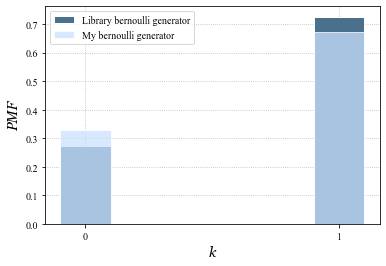

In [23]:
fig, ax = plt.subplots()
ax.bar(['0', '1'], counts_bernoulli / len(check_bernoulli), width = 0.2, color = '#4A708B', edgecolor = 'w')
ax.bar(['0', '1'], my_counts_bernoulli / len(my_bernoulli), width = 0.2, color = '#CAE1FF', edgecolor = 'w', alpha = 0.75)
plt.xlabel("k", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("PMF", fontname="Georgia", style="italic", fontsize=14) # Probability Mass Function (PMF) => P(X = k)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.set_axisbelow(True)
plt.legend(['Library bernoulli generator', 'My bernoulli generator'], loc = 'best')
fig.savefig('1.pdf')
plt.show()

In [24]:
check_binomial = np.random.binomial(n = k, p = p, size = n)
my_binomial = binomial(p, k, n)

values_binomial, counts_binomial = np.unique(check_binomial, return_counts = True)
str_binomial = [str(i) for i in values_binomial]

my_values_binomial, my_counts_binomial = np.unique(my_binomial, return_counts = True)
my_str_binomial = [str(i) for i in my_values_binomial]

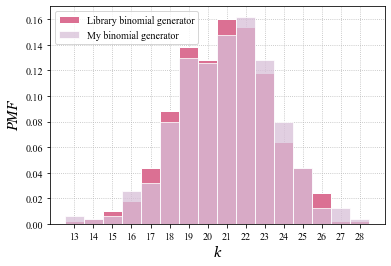

In [25]:
fig, ax = plt.subplots()
ax.bar(str_binomial, counts_binomial / len(check_binomial), width = 1, color = '#DB7093', edgecolor = 'w')
ax.bar(my_str_binomial, my_counts_binomial / len(my_binomial), width = 1, color = '#D8BFD8', edgecolor = 'w', alpha = 0.75)
plt.xlabel("k", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("PMF", fontname="Georgia", style="italic", fontsize=14) # Probability Mass Function (PMF) => P(X = k)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.set_axisbelow(True)
plt.legend(['Library binomial generator', 'My binomial generator'], loc = 'best')
fig.savefig('2.pdf')
plt.show()

   <font color=#7A378B> 2. __Геометрическое распределение__ $-$ распределение, при котором проводится серия испытаний Бернулли с вероятностями успеха $p$ и неуспеха $q = 1 - p$ до тех пор, пока не произойдет событие (пока не будет получен первый успех).</font>

In [128]:
def geomrnd(p, n):
    iter = 0
    arr = np.array([], dtype = int)
    while iter < n:
        k = np.where(bernoulli(p, n) == 1)[0]
        if k.size == 0: #Если никаких индексов, где стояла единица нет, то генерируем еще раз
            iter -= 1
            continue
        else:
            arr = np.append(arr, k[0]) 
        iter += 1
    return arr

In [129]:
# Значения параметров
n = 2000
p = 0.35

In [130]:
check_geomrnd = np.random.geometric(p, n) 
'''
В библиотечной функции k принимает только натуральные значения: k = 1,2,... Вероятность того, что событие A впервые
произойдет во время (k+1)-ого испытания (т.е. после k неуспехов), равна p*(1 − p)^k, поэтому вычтем из каждого элемента вектора  
единицу.
'''
check_geomrnd = [i - 1 for i in check_geomrnd]
my_geomrnd = geomrnd(p, n)

values_geomrnd, counts_geomrnd = np.unique(check_geomrnd, return_counts = True)
str_geomrnd = [str(i) for i in values_geomrnd]

my_values_geomrnd, my_counts_geomrnd = np.unique(my_geomrnd, return_counts = True)
my_str_geomrnd = [str(i) for i in my_values_geomrnd]

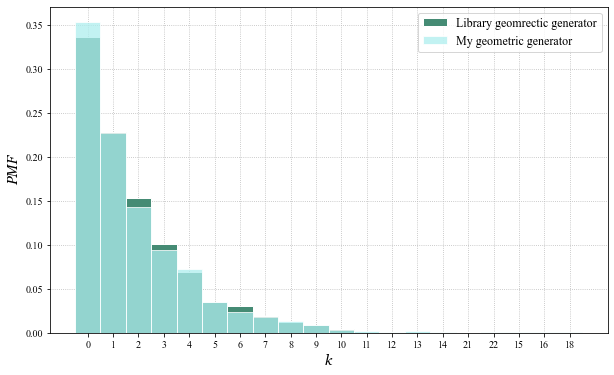

In [131]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(str_geomrnd, counts_geomrnd / len(check_geomrnd), width = 1, color = '#458B74', edgecolor = 'w')
ax.bar(my_str_geomrnd, my_counts_geomrnd / len(my_geomrnd), width = 1, color = '#AEEEEE', edgecolor = 'w', alpha = 0.75)
plt.xlabel("k", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("PMF", fontname="Georgia", style="italic", fontsize=14) # Probability Mass Function (PMF) => P(X = k)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.set_axisbelow(True)
plt.legend(['Library geomrectic generator', 'My geometric generator'], loc = 'upper right', fontsize = 12)
fig.savefig('3.pdf')
plt.show()

<font color=#7A378B> Запишем свойство отсутствия памяти (отсутствия последействия): 
$$\mathbb{P}(X \geqslant t + s|X \geqslant s) = \mathbb{P}(X \geqslant t) > 0,\ \forall t,\ s \in \{0,\ 1,\ 2, \dots\}.$$
Из определения геометрического распределения получаем: 
$$\mathbb{P}(X \geqslant s) = \mathbb{P}(X = s) + \mathbb{P}(X = s + 1) + \ldots = \sum_{k = s}^\infty p(1-p)^k = p(1-p)^s\left(1+(1-p)+(1-p)^2+ \dots\right) =p(1-p)^s\sum_{m = 0}^\infty (1-p)^m = (1-p)^s$$
$$\mathbb{P}(X \geqslant t + s|X \geqslant s) = \frac{\mathbb{P}(X \geqslant t + s, X \geqslant s)}{\mathbb{P}(X\geqslant s)} = \frac{\mathbb{P}(X \geqslant t + s)}{\mathbb{P}(X\geqslant s)} = \frac{(1-p)^{t+s}}{(1-p)^s} = (1-p)^t = \mathbb{P}(X \geqslant t)$$</font>

In [132]:
# Значения параметров
n = 2000
p = 0.35
t = 4

In [133]:
my_geomrnd = geomrnd(p, n)
my_values_geomrnd, my_counts_geomrnd = np.unique(my_geomrnd, return_counts = True)
my_str_geomrnd = [str(i) for i in my_values_geomrnd]

geomrnd_t = [i - t for i in my_geomrnd if i >= t]
values_geomrnd_t, counts_geomrnd_t = np.unique(geomrnd_t, return_counts = True)
str_geomrnd_t = [str(i) for i in values_geomrnd_t]

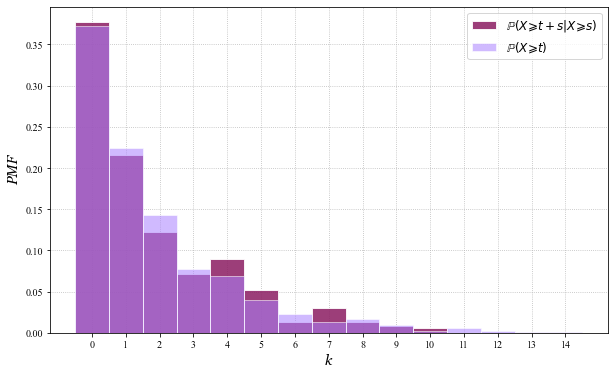

In [134]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(str_geomrnd_t, counts_geomrnd_t / len(geomrnd_t), width = 1, color = '#8B1C62', edgecolor = 'w', alpha = 0.85)
ax.bar(my_str_geomrnd, my_counts_geomrnd / len(my_geomrnd), width = 1, color = '#AB82FF', edgecolor = 'w', alpha = 0.55)
plt.xlabel("k", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("PMF", fontname="Georgia", style="italic", fontsize=14) # Probability Mass Function (PMF) => P(X = k)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.set_axisbelow(True)
plt.legend(['$\mathbb{P}(X \geqslant t + s|X \geqslant s)$', '$\mathbb{P}(X \geqslant t)$'], loc = 'upper right', fontsize = 12)
fig.savefig('4.pdf')
plt.show()

<font color=#7A378B> 3. Пусть $\xi_1, \xi_2, \dots$ $-$ последовательность независимых одинаково распределенных случайных величин, каждая из
которых принимает значение $1$, если выпал орел (успех), и $-1$, если выпала решка (неуспех). 
$$\mathbb{P}(\xi_i = 1) = \mathbb{P}(\xi_i = -1) = \frac{1}{2}$$
$$S_n = \sum\limits_{i = 1}^\infty \xi_i$$
$$\mathbb{E}\xi_i = -1 \cdot \mathbb{P}(\xi_i = -1) + 1 \cdot \mathbb{P}(\xi_i = 1)= -\frac{1}{2}+\frac{1}{2} = 0$$
$$\mathbb{Var}\xi_i = \mathbb{E}{\xi_i}^2 - (\mathbb{E}\xi_i)^2 = 1 \cdot \mathbb{P}(\xi_i^2 = 1) = 1$$
По классической ЦПТ:
$$\frac{S_n - \mathbb{E}(\xi_i)n}{\sigma(\xi_i)\sqrt{n}} = \frac{S_n - \mathbb{E}(\xi_i)n}{\sqrt{\mathbb{Var}\xi_i}\sqrt{n}} =  \frac{S_n}{\sqrt{n}} = Y(n) \overset{d}{\underset{n \to \infty}{\longrightarrow}} \nu \sim \mathcal{N}(0,1)$$ <font>

In [135]:
#Значения параметров
n = 800
p = 0.5

In [138]:
arr_game = bernoulli(p, n)
arr_game = [-1 if i == 0 else i for i in arr_game]
S = np.cumsum(arr_game)
Y = [S[i] / np.sqrt(n) for i in range(n)]

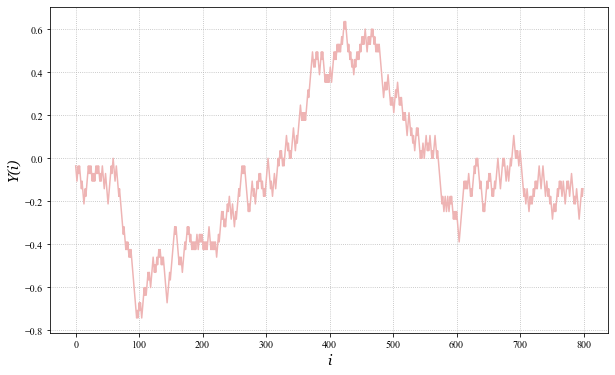

In [139]:
plt.figure(figsize = (10, 6))
plt.plot(Y, color = '#EEB4B4')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.xlabel("i", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("Y(i)", fontname="Georgia", style="italic", fontsize=14)
plt.savefig('5.pdf')
plt.show()

## Задание № 2

1. Построить датчик сингулярного распределения, имеющий в качестве функции распределения канторову лестницу. С помощью критерия Колмогорова убедиться в корректности работы датчика.
2. Для канторовых случайных величин проверить свойство симметричности относительно $\frac{1}{2}$ ($X$ и $1-X$ распределены одинаково) и самоподобия относительно деления на $3$ (условное распределение $Y$ при условии $Y \in [0, \frac{Y}{3}]$ совпадает с распределением $\frac{1}{3}$ с помощью критерия Смирнова.
3. Вычислить значение математического ожидания и дисперсии для данного распределения. Сравнить теоретические значения с эмпирическими для разного объема выборок. Проиллюстрировать сходимость.

<font color=#7A378B> 1. Распределение называется __сингулярным__, если оно сосредоточено на континуальном множестве с нулевой мерой Лебега. <font>
    
<font color=#7A378B> При построении Канторова множества $\mathcal{C}$ (мера Лебега которого равна нулю) на отрезке $[0, 1]$ мы "выбрасываем" интервалы $(\frac{1}{3}, \frac{2}{3}),\ (\frac{1}{9}, \frac{2}{9}),\ (\frac{7}{9}, \frac{8}{9}), \ldots$. То есть получается, что в троичной записи десятичной дроби будут отсутствовать единицы (Например, выбрасывая интервал $(\frac{1}{3}, \frac{2}{3})$, мы, тем самым, говорим, что на первой позиции числа после запятой $0,?\ldots$ не может стоять единица).
Каждой точке $x = \frac{a_1}{3} + \frac{a_2}{3^2} + \frac{a_3}{3^3} +\ldots,\ x \in \mathcal{C}$ можно отнести последовательность $a_1,\ a_2,\ldots,\ a_n$ , где $a_i \in \{0,\ 2\}$, которой, в свою очередь, соответствует последовательность вида $b_1,\ b_2,\ldots,\ b_n$, где $b_i \in \{0,\ 1\}$, генерируемая датчиком Бернулли с вероятностью $p = \frac{1}{2}$. <font>
    
<font color=#7A378B>  Пусть функция $K(x)$ $-$ канторова лестница. В точках $0$ и $1$ ее значение принимается равным соответственно $0$ и $1$. Далее интервал $(0,\,1)$ разбивается на три равные части $\left(0,\ \frac {1}{3}\right)$, $\left(\frac{1}{3},\ \frac {2}{3}\right)$ и $\left(\frac{2}{3},\ 1\right)$. На среднем сегменте полагаем $K(x)=\frac{1}{2}$. Оставшиеся два сегмента снова разбиваются на три равные части каждый, и на средних сегментах $K(x)$ полагается равной $\frac{1}{4}$ и $\frac{3}{4}$.Каждый из оставшихся сегментов снова делится на три части, и на внутренних сегментах $K(x)$ определяется как постоянная, равная среднему арифметическому между соседними, уже определенными значениями $K(x)$. На остальных точках единичного отрезка определяется по непрерывности. <font>
    
<font color=#7A378B> $$x = \sum\limits_{i = 1}^n{\frac{2b_i}{3^i}}$$
$$K(x) = \sum\limits_{i = 1}^n{\frac{b_i}{2^i}}$$<font>
    
<font color=#7A378B> Будем рассматривать частичные суммы. Для этого этого введем погрешность $\varepsilon$ и найдем такое число $n$, при котором частичная сумма будет отличаться от бесконечной не более, чем на заданную погрешность.
$$ \sum\limits_{i=n+1}^{\infty} \frac{2b_i}{3^i} \leqslant 2\sum\limits_{i=n+1}^{\infty}\frac{1}{3^i} = \frac{1}{3^{n}} \leqslant \varepsilon$$ <font>
$$-\log_3 \varepsilon \leqslant n$$

In [140]:
def cantor(n, epsilon):
    m = np.ceil(-(np.log(epsilon) / np.log(3))).astype(np.int32)
    b = bernoulli(p, n * m).reshape(n, m)
    x = (2 * b / np.power(3, np.arange(m) + 1)[None, :]).sum(axis = 1)
    F = (b / np.power(2, np.arange(m) + 1)[None, :]).sum(axis = 1)
    return x, F

In [141]:
def K(x, epsilon):
    if x > 0 and x < 1:
        y = 0
        a = 0.
        b = 1.
        middle = (b-a) / 2
        while b - a > epsilon:
            if x >= a + 2*(b - a) / 3:
                a += 2*(b - a) / 3
                y += middle
            elif x <= b - 2*(b - a) / 3:
                b -= 2*(b - a) / 3
            else:
                return y + middle
            middle /= 2
        return y
    else:
        return x

In [142]:
# Значения параметров
n = 3000
epsilon = 0.00001

In [151]:
x = sorted(cantor(n, epsilon)[0])
F = sorted(cantor(n, epsilon)[1])

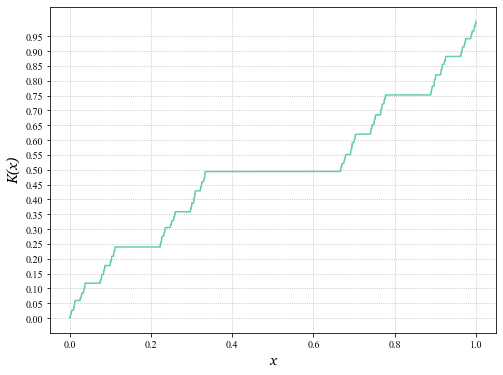

In [152]:
plt.figure(figsize = (8, 6))
plt.plot(x, F, color = '#66CDAA')
plt.xlabel("x", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("K(x)", fontname = "Georgia", style = "italic", fontsize = 14) 
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.yticks(np.arange(0, 1.0, 0.05))
plt.savefig('6.pdf')
plt.show()

<font color=#7A378B>  __Критерий Колмогорова__. Пусть эмпирическая функция распределения $F_n(x)$, построенная по выборке $X=\left(X_1, \ldots, X_n\right)$, имеет вид:
$$F_n(x)=\frac{1}{n} \sum_{i=1}^n \mathbb{1}_{X_i \leq x},$$
где $\mathbb{1}_{X_i \leq x}$ - индикатор, указывающий попало ли наблюдение $X_i$ в область $(-\infty, x]$. Статистика критерия для эмпирической функции:
$$D_n=\sup _{x \in \mathbb{R}}\left|F_n(x)-F(x)\right|,$$
Способ проверки гипотезы — сравнение статистки $\sqrt{n}D_n$ с критическим значением $K_\alpha$, то есть с верхним квантилем распределения, рассчитываемым как $K_\alpha = F_K^{-1}(1-\alpha)$.
    Этот подход требует обращения функции распределения, что аналитически невозможно. Поэтому иногда пользуются аппроксимацией функции распределения Колмогорова $F_K(x) \approx 1 - 2 e^{-2x^2}$, которая легко обратима. 
    Гипотеза о соответствии выборки принимается с заданным уровнем значимости $\alpha$ при $\sqrt{n}D_n < K_\alpha$ и отвергается иначе. 
    $$F_K^{-1}(x) = \sqrt{-\frac{1}{2}\ln{\frac{1-x}{2}}}$$
    $$K_{\alpha} = F_K^{-1}(1-\alpha) = \sqrt{-\frac{1}{2}\ln{\frac{\alpha}{2}}}$$<font>

In [ ]:
alpha = 0.002

In [ ]:
X = cantor(n, epsilon)[0]
t = np.linspace(0, 1, n)
K_n = [K(i, epsilon) for i in t]
F_n = [(X < i).sum()/n for i in t]
D_n = max(abs(np.array(F_n) - np.array(K_n)))
K_alpha = np.sqrt(-0.5*np.log(alpha/2))
if K_alpha > np.sqrt(n)*D_n:
    print("Гипотеза принимается")
else:
    print("Гипотеза отвергается")

Гипотеза принимается


<font color=#7A378B> 2. Критерий однородности Смирнова используется для проверки гипотезы о принадлежности двух независимых выборок одному закону распределения, то есть говорит о том, что два эмпирических распределения соответствуют одному и тому же закону.<font>
    
<font color=#7A378B>__Критерий Смирнова__.  Обозначим за $H_0$ гипотезу о том, что две исследуемые выборки объемами $n$ и $m$ с эмперическими функциями распределения $F_n(x)$ и $F_m(x)$ распределены по одному закону. Введем статистику критерия:
$$ D_{n,\,m} = \sup\limits_{x}|F_n(x) - F_m(x)|.$$
Тогда если гипотеза $H_0$ верна, то при увеличении объемов выборок $n$ и $m$ случайная величина $\sqrt{\frac{nm}{n + m}}D_{n,m}$ будет сходиться по распределению к случайной величине $K$ с функцией распределения Колмогорова
$$ F_K(x) = 1 + 2\sum_{i = 1}^{\infty} (-1)^k e^{-2k^2x^2}. $$ <font>

In [56]:
n = 1000
m = 2000
alpha = 0.003

In [ ]:
# Свойство симметричности
K_alpha = np.sqrt(-0.5*np.log(alpha/2))
X_F_n = cantor(n, epsilon)[0].reshape((1, n)) # X1
X = cantor(m, epsilon)[0].reshape((1, m)) # X2
X_F_m = np.array([1]*len(X)) - np.array(X) # 1 - X2

t = np.linspace(0, 1, max(n, m))
F_n = np.array([(X_F_n < i).sum()/n for i in t])
F_m = np.array([(X_F_m < i).sum()/m for i in t])

D_nm = max(abs(F_n - F_m))
if np.sqrt(n*m/(n+m))*D_nm < K_alpha:
    print("Гипотеза принимается")
else:
    print("Гипотеза отвергается")

Гипотеза принимается


In [ ]:
alpha = 0.005

In [ ]:
#Свойство самоподобия
K_alpha = np.sqrt(-0.5*np.log(alpha/2))
Y = cantor(n, epsilon)[0] # Y
Y1 = Y[Y <= 1/3]
Y2 = Y/3
n = Y1.shape[0]
m = Y2.shape[0]

t = np.linspace(0, 1, max(n, m))

F_n = np.array([(Y1 < i).sum()/n for i in t])
F_m = np.array([(Y2 < i).sum()/m for i in t])

D_nm = max(abs(F_n - F_m))
if np.sqrt(n*m/(n+m))*D_nm < K_alpha:
    print("Гипотеза принимается")
else:
    print("Гипотеза отвергается")

Гипотеза принимается


<font color=#7A378B> 3.Вычислим значения математического ожидания и дисперсии для случайной величины $\xi \sim Be(p)$:
$$\mathbb{E}\xi = \mathbb{P}(\xi = 1)\cdot 1 + \mathbb{P}(\xi = 0)\cdot 0 = p + (1-p)\cdot 0 = p$$
$$\mathbb{Var}\xi = \mathbb{E}\xi^2 - \left(\mathbb{E}\xi\right)^2 = p - p^2 = p(1-p)$$<font>

<font color=#7A378B> Математическое ожидание и дисперсия для $X_n \sim Cantor(n)$:
$$\mathbb{E} X_n=\mathbb{E} \sum_{i=1}^{\infty} \frac{2b_i}{3^i}=\sum_{i=1}^{\infty} \frac{2}{3^i} \mathbb{E} b_i=\sum_{i=1}^{\infty} \frac{2}{3^i} \cdot \frac{1}{2}=\frac{\frac{1}{3}}{1-\frac{1}{3}}=\frac{1}{2}$$<font>
    
<font color=#7A378B> $X_1, \ldots, X_n$ независимы:
$$\mathbb{Var} X_n=\mathbb{Var}\sum_{i=1}^{\infty} \frac{2b_i}{3^i}=\sum_{i=1}^{\infty}\left(\frac{2}{3^i}\right)^2 \mathbb{Var} b_i=\sum_{k=i}^{\infty} \frac{4}{9^i} \cdot \frac{1}{4}=\frac{\frac{1}{9}}{1-\frac{1}{9}}=\frac{1}{8}$$ <font>

In [168]:
size = [i for i in range(100, 30100, 100)]
epsilon = 0.000001
length = len(size)
E = np.array([])
Var = np.array([])
for i in tqdm(range(len(size))):
    X = cantor(size[i], epsilon)[0]
    E = np.append(E, X.mean())
    Var = np.append(Var, ((X - E[i])**2).mean())
E_check = [0.5]*len(size)
Var_check = [0.125]*len(size)

100%|██████████| 300/300 [00:01<00:00, 209.66it/s]


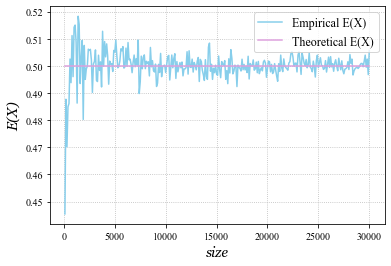

In [169]:
plt.plot(size, E, color = '#87CEEB')
plt.plot(size, E_check, color = '#DDA0DD')
plt.xlabel("size", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("E(X)", fontname = "Georgia", style = "italic", fontsize = 14) 
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.legend(['Empirical E(X)', 'Theoretical E(X)'], loc = 'upper right', fontsize = 12)
plt.savefig('7.pdf')
plt.show()

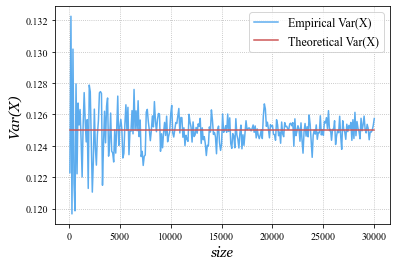

In [170]:
plt.plot(size, Var, color = '#5CACEE')
plt.plot(size, Var_check, color = '#CD5555')
plt.xlabel("size", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("Var(X)", fontname = "Georgia", style = "italic", fontsize = 14) 
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.legend(['Empirical Var(X)', 'Theoretical Var(X)'], loc = 'best', fontsize = 12)
plt.savefig('8.pdf')
plt.show()

### Комментарии проверяющего

Узнаю некоторые формулы и обоснования одного студента Сергея Николаевича. Надеюсь, вы либо сами это написали, 
либо разобрались и усвоили обоснования. Выглядит похоже на правду, **зачтено**.


## Задание № 3

1. Построить датчик экспоненциального распределения. Проверить для данного распределения свойство отсутствия памяти. Пусть $X_1, X_2, \ldots, X_n$ $-$ независимо экспоненциально распределенные с.в. с параметрами $\lambda_1, \lambda_2, \ldots, \lambda_n$ соответственно. Найти распределение случайной величины $Y=\min \left(X_1, X_2, \ldots, X_n\right)$.
2. На основе датчика экспоненциального распределения построить датчик пуассоновского распределения.
3. Построить датчик пуассоновского распределения как предел биномиального распределения. С помощью критерия хи-квадрат Пирсона убедиться, что получен датчик распределения Пуассона.
4. Построить датчик стандартного нормального распределения методом моделирования случайных величин парами с переходом в полярные координаты. Проверить при помощи критерия $t$-критерия Стьюдента равенство математических ожиданий, а при помощи критерия Фишера равенство дисперсий.

<font color=#7A378B>  1. Рассмотрим экспоненциальное распределение:
$$ F(x)= \begin{cases}1-e^{-\lambda x}, & x \geqslant 0, \\ 0, & x<0 .\end{cases} $$
    
<font color=#7A378B> ***Теорема***. Пусть некоторая функция распределения $F$ имеет обратную $F^{-1}$. Тогда $F$ является функцией распределения случайной величины
$$\eta = F^{-1}(\xi),$$
где $\xi \sim \mathcal{U}[0,\ 1]$.<font>
    
<font color=#7A378B> Обращаем функцию распределения: $\tilde{F}(y)=-\frac{1}{\lambda} \ln (1-y)$. <font>

<font color=#7A378B> Замечаем, что если $\xi \sim U[0,1]$, то $\eta=1-\xi$ имеет такое же распределение, что и $\xi$. Поэтому можем положить $x=-\frac{1}{\lambda} \ln y$, где $y-$ значение равномерно распределенной на $[0,1]$ случайной величины. <font>

In [171]:
def exponential_generator(lambda_value, n):
    y = np.random.random(size = n)
    x = (-1/lambda_value)*np.log(y)
    return x

In [172]:
# Значения параметров 
lambda_value = 0.5
n = 1000

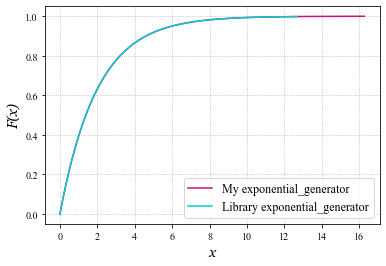

In [173]:
check_exponential_generator = np.random.exponential(1/lambda_value, n)
my_exponential_generator = exponential_generator(lambda_value, n)
F = lambda x: 1 - np.exp(-lambda_value*x)
F_check = F(check_exponential_generator)
my_F = F(my_exponential_generator)
plt.plot(sorted(my_exponential_generator), sorted(my_F), color = '#CD1076')
plt.plot(sorted(check_exponential_generator), sorted(F_check), color = '#00CDCD')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.xlabel("x", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("F(x)", fontname = "Georgia", style = "italic", fontsize = 14)
plt.grid(True)
plt.legend(['My exponential_generator', 'Library exponential_generator'], loc = 'best', fontsize = 12)
plt.savefig('9.pdf')
plt.show()

<font color=#7A378B> Свойство отсутствия памяти:
случайная величина $X \sim \mathcal{Exp}(\lambda)$ обладает свойством отсутствия памяти, выражающемся в следующем выражении:
$$\mathbb{P}(X \geqslant t+s | X \geqslant s)=\mathbb{P}(X \geqslant t)$$
$$\mathbb{P}(X \geqslant t+s | X \geqslant s)=\frac{\mathbb{P}(X \geqslant t+s,  X \geqslant s)}{\mathbb{P}(X \geqslant s)}=\frac{\mathbb{P}(X \geqslant t+s)}{\mathbb{P}(X \geqslant s)}=\frac{e^{-\lambda(t+s)}}{e^{-\lambda s}}=e^{-\lambda t}=\mathbb{P}(X \geqslant t)$$ <font>

In [174]:
#Значения параметров
lambda_value = 3
n = 1000
t = 0.5

In [175]:
X = exponential_generator(lambda_value, n)
X_t = X[X >= t] - t
x = sorted(X)
x = np.linspace(x[0], x[-1], n)
Y = [(X < i).sum()/n for i in x]
Y_t = [(X_t < i).sum()/X_t.shape[0] for i in x]

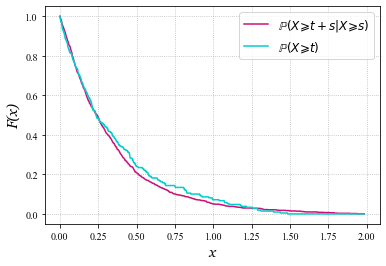

In [176]:
plt.plot(x, 1-np.array(Y), color = '#CD1076')
plt.plot(x, 1-np.array(Y_t), color = '#00CDCD')
plt.xlabel("x", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("F(x)", fontname = "Georgia", style = "italic", fontsize = 14) 
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.legend(['$\mathbb{P}(X \geqslant t + s|X \geqslant s)$', '$\mathbb{P}(X \geqslant t)$'], loc = 'best', fontsize = 12)
plt.savefig('10.pdf')
plt.show()

<font color=#7A378B> Рассмотрим $X_1, X_2, \ldots, X_n-$ независимо экспоненциально распределенные с.в. с параметрами $\lambda_1, \lambda_2, \ldots, \lambda_n$ соответственно. Найдем распределение случайной величины $Y=\min \left(X_1, X_2, \ldots, X_n\right)$.
$$F_Y(x)=P(Y<x)=P\left(\min \left(X_1, \ldots, X_n\right)<x\right)=1-P\left(\min \left(X_1, \ldots, X_n\right) \geq x\right)=1-P\left(X_1 \geq x, \ldots, X_n \geq x\right)=1-P\left(X_1 \geq x\right) \cdot \ldots \cdot P\left(X_n \geq x\right)=1-\left(1-P\left(X_1<x\right)\right)\cdot\ldots\cdot\left(1-P\left(X_n<x\right)\right)=1-e^{\left(\lambda_1+\cdots+\lambda_n\right) x}$$
<font>
<font color=#7A378B> Значит, случайная величина $Y$ имеет экспоненциальное распределение с параметром $\lambda=\lambda_1+\cdots+\lambda_n$ :
$$Y \sim \mathcal{Exp}\left(\sum_{i=1}^n \lambda_i\right)$$ <font>

<font color=#7A378B> 2. $\xi \sim \mathcal{Pois}(\lambda)$ , если :
$$P(\xi=k)=\frac{\lambda^k}{k !} e^{-\lambda}, \quad k \in \mathbb{N_0}$$
***Теорема***. Пусть $X_1, \ldots X_n-$ независимые с.в.  $\sim \mathcal{Exp}(\lambda)$. Тогда можно построить с.в. $Y \sim \mathcal{Pois}(\lambda)$ :
$$Y=\max _n\left(\left(S_n=X_1+\cdots+X_n\right) < 1\right) $$
Причем $Y=0$ при $X_1 \geqslant 1$. <font>


In [177]:
def poisson(lambda_value, n):
    j = 0
    Y = np.zeros(n, dtype = int)
    while j < n:
        i = 1
        S = 0
        while S < 1:
            S += exponential_generator(lambda_value, 1)
            Y[j] += 1
        j += 1
    return Y

In [178]:
#Значения параметров
lambda_value = 10
n = 1000

In [181]:
my_poisson = poisson(lambda_value, n)
check_poisson = np.random.poisson(lambda_value, n)

values_poisson, counts_poisson = np.unique(check_poisson, return_counts = True)
str_poisson = [str(i) for i in values_poisson]

my_values, my_counts = np.unique(my_poisson, return_counts = True)
my_str = [str(i) for i in my_values]

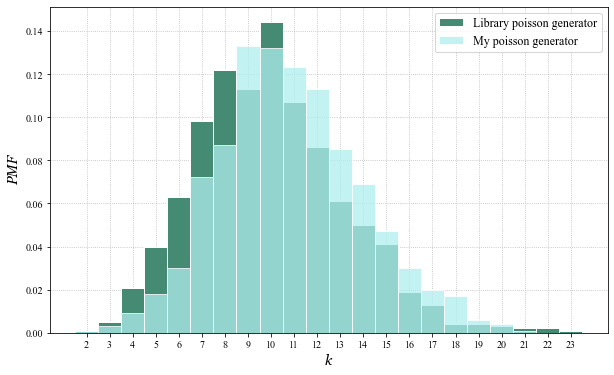

In [182]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(str_poisson, counts_poisson / len(check_poisson), width = 1, color = '#458B74', edgecolor = 'w')
ax.bar(my_str, my_counts / len(my_poisson), width = 1, color = '#AEEEEE', edgecolor = 'w', alpha = 0.75)
plt.xlabel("k", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("PMF", fontname="Georgia", style="italic", fontsize=14) # Probability Mass Function (PMF) => P(X = k)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.set_axisbelow(True)
plt.legend(['Library poisson generator', 'My poisson generator'], loc = 'upper right', fontsize = 12)
plt.savefig('11.pdf')
plt.show()

<font color=#7A378B> 3. Биномиальное распределение сходится к распределению Пуассона при $n \rightarrow \infty$ в то время как произведение $n p$ остается фиксированным или, по крайней мере, $p$ стремится к нулю. Поэтому распределение Пуассона с параметром $\lambda=n p$ можно использовать как приближение к $\mathcal{Bi}(n, p)$ биномиального распределения, если $n$ достаточно велико, а $p$ достаточно мало. <font>

<font color=#7A378B> Пусть случайная величина $\xi \sim \mathcal{Bi}(n, p)$ .
$$\mathbb{P}_n(\xi=k)=C_n^k p^k(1-p)^{n-k}$$ <font>
    
<font color=#7A378B> Зафиксируем значение $\lambda = np$, которое является математическим ожиданием биномиального распределения и будем устремлять параметр $n$ к бесконечности:
$$\lim_{n\to\infty}\mathbb{P}_n(k) = \lim_{n\to\infty}\left[C_n^k\cdot \left(\frac{\lambda}{n}\right)^k\cdot\left(1 - \frac\lambda n \right)^{n-k}\right]=\frac{\lambda^k}{k!} \cdot e^{-\lambda} \cdot \lim_{n\to\infty}\left[ \frac{n!}{n^k(n-k)!} \left( 1 - \frac\lambda n \right)^{-k} \right]= \frac{\lambda^k}{k!} \cdot e^{-\lambda} \cdot \lim_{n\to\infty}\left[ \frac{n(n-1)\ldots(n-k+1)}{n^k} \left( 1 - \frac\lambda n \right)^{-k} \right] = \frac{\lambda^k}{k!} e^{-\lambda}$$ <font>

In [183]:
def poisson_binomial(lambda_value, n, k = n):
    return binomial(lambda_value/n, k, n)

In [184]:
my_poisson_binomial = poisson_binomial(lambda_value, n)
check_poisson = np.random.poisson(lambda_value, n)

values_poisson, counts_poisson = np.unique(check_poisson, return_counts = True)
str_poisson = [str(i) for i in values_poisson]

my_values, my_counts = np.unique(my_poisson_binomial, return_counts = True)
my_str = [str(i) for i in my_values]

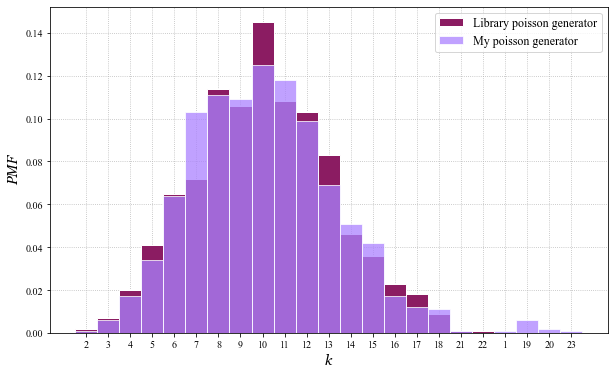

In [185]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(str_poisson, counts_poisson / len(check_poisson), width = 1, color = '#8B1C62', edgecolor = 'w')
ax.bar(my_str, my_counts / len(my_poisson), width = 1, color = '#AB82FF', edgecolor = 'w', alpha = 0.75)
plt.xlabel("k", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("PMF", fontname="Georgia", style="italic", fontsize=14) # Probability Mass Function (PMF) => P(X = k)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.set_axisbelow(True)
plt.legend(['Library poisson generator', 'My poisson generator'], loc = 'upper right', fontsize = 12)
fig.savefig("12.pdf")
plt.show()

<font color=#7A378B> Проверим с помощью критерия $\chi^2-$Пирсона гипотезу о распределении по закону Пуассона. <font>

In [88]:
#Значения параметров
lambda_value = 0.6
n = 1000
alpha = 0.4

In [89]:
from scipy.stats.distributions import chi2
critical_value = chi2.ppf(alpha, df = 4)

In [90]:
X = poisson_binomial(lambda_value, n, k = n)
lambda_new = X.mean()
my_values, my_counts = np.unique(X, return_counts = True)
p_k = np.array([])
for k in my_values:
    factorial = np.math.factorial(k)
    p_k = np.append(p_k, lambda_new**k/factorial*np.exp(-lambda_new))
n_k = np.zeros(p_k.shape[0])
for i in range(p_k.shape[0]):
    n_k[i] = n * p_k[i]
res = np.zeros(n_k.shape[0])
for i in range(res.shape[0]):
    res[i] = (my_counts[i] - n_k[i])**2/n_k[i]
answ = np.sum(res)

if answ < critical_value:
    print('Гипотеза принимается')
else:
    print('Гипотеза отвергается')

Гипотеза отвергается


<font color=#7A378B> 4. $\xi \sim \mathcal{N}(0,1)$, если ее функция плотности вероятности задается формулой:
$$f_{\xi}(x)=\frac{1}{\sqrt{2 \pi}} e^{-\frac{x^{2}}{2}}$$
Построим генератор стандартной нормальной случайной величины, воспользовавшись методом Бокса-Мюллера. 

![1.png](attachment:1.png)

![2.jpg](attachment:2.jpg)

![3.jpg](attachment:3.jpg)

In [186]:
def standard_normal(n):
    u_1 = np.random.random(size = n)
    u_2 = np.random.random(size = n)
    z0 = np.sqrt(-2*np.log(u_1))*np.cos(2*np.pi*u_2)
    z1 = np.sqrt(-2*np.log(u_1))*np.sin(2*np.pi*u_2)
    return z0, z1

In [187]:
# Значения параметров
n = 1000

In [188]:
X_1, X_2 = standard_normal(n)
t = np.linspace(-3, 3, n) # Правило трёх сигм
Y = [(X_1 < i).sum()/n for i in t]

X_check = np.random.normal(0, 1, n)
Y_check = [(X_check < i).sum()/n for i in t]

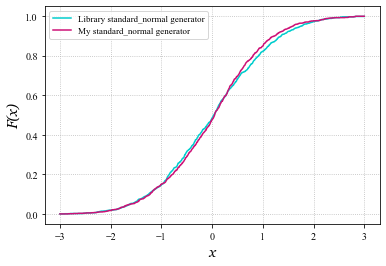

In [189]:
plt.plot(t, sorted(Y_check), color = '#00CDCD')
plt.plot(t, sorted(Y), color = '#CD1076')
plt.xlabel("x", fontname = "Georgia", style="italic", fontsize = 14)
plt.ylabel("F(x)", fontname="Georgia", style="italic", fontsize=14)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.legend(['Library standard_normal generator', 'My standard_normal generator'], loc = 'best', fontsize = 9)
plt.savefig('13.pdf')
plt.show()

<font color=#7A378B> При помощи критерия  __t $-$ критерия Стьюдента__ проверим равенство математических ожиданий.<font>

<font color=#7A378B> $$t=\frac{\bar{X}-\mu_0}{\frac{s}{\sqrt{n}}},$$
В нашем случае $\mu_0 = 0$. <font>

<font color=#7A378B> Несмещенная оценка дисперсии вычисляется следующим образом:
$$s^2=\frac{\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}{n-1}$$
Степень свободы равна $(n-1)$. <font>

In [ ]:
# Значения параметров
alpha = 0.02
n = 1000

In [ ]:
X_1, X_2 = standard_normal(n)
s = np.sqrt(np.sum((X_1 - X_1.mean()) ** 2) / (n - 1))
t = X_1.mean() / np.sqrt(s / n)
right = stats.t.ppf(1 - alpha / 2, n - 1)
left = stats.t.ppf(alpha / 2, n - 1)
if left < t and t < right:
    print('Гипотеза принимается')
else:
    print('Гипотеза отвергается')

Гипотеза принимается


<font color=#7A378B> __Критерий Фишера__ применяется для проверки равенства дисперсий двух выборок объемом $m$ и $n$ соответственно случайных величин $X$ и $Y$ с нормальным распределением. Статистика Фишера вычисляется следующим образом:
$$F=\frac{\hat{\sigma}_X^2}{\hat{\sigma}_Y^2},$$
где $\hat{\sigma}_n^2-$ выборочная дисперсия, вычисляемая по формуле:
$$\hat{\sigma}_n^2=\frac{\sum\limits_{i=1}^n\left(X_i-\bar{X}\right)^2}{n}$$
Степени свободы определяются длиной выборок: $m-1$ и $n-1$. <font>

In [ ]:
# Значения параметров
alpha = 0.02
n = 1000
m = 800

In [ ]:
X_1, x_1 = standard_normal(n)
X_2, x_2 = standard_normal(m)
Var_X_1 = np.sum((X_1 - X_1.mean()) ** 2) / (n - 1)
Var_X_2 = np.sum((X_2 - X_2.mean()) ** 2) / (m - 1)
F = Var_X_1 / Var_X_2
left = stats.f.ppf(alpha / 2, n - 1, m - 1)
right = stats.f.ppf(1 - alpha / 2, n - 1, m - 1)
if left < F and F < right:
    print('Гипотеза принимается')
else:
    print('Гипотеза отвергается')

Гипотеза принимается


## Задание № 4

1. Построить датчик распределения Коши.
2. На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения. При помощи функции $\texttt{normal probability plot}$ убедиться в корректности построенного датчика и обосновать наблюдаемую линейную зависимость.
3. Сравнить скорость моделирования стандартного нормального распределения в заданиях 3 и 4.

<font color=#7A378B> 1. Будем говорить, что случайная величина $X$ имеет распределение Коши $X \sim Cauchy(a, b)$ с параметрами $a$ и $b$, если ее плотность распределения задается следующей формулой:
$$f_{X} = \frac{1}{\pi}\frac{b}{(x-a)^2+b^2},$$
где $a$ — параметр сдвига, $b$ — параметр масштаба. <font>
    
<font color=#7A378B> Функция распределения Коши имеет вид:
$$F_X(x) = \frac{1}{\pi}\arctan{\left(\frac{x-a}{b}\right)}+\frac{1}{2}$$ <font>
    
<font color=#7A378B> Она строго возрастает и имеет обратную функцию:
$$F_X^{-1}(x) = a + b \cdot \tan\left(\pi\left(x-\frac{1}{2}\right)\right)$$ <font>

In [26]:
def cauchy(a, b, n):
    y = np.random.random(size = n)
    x = a + b * np.tan(np.pi * (y - 0.5))
    return x

In [191]:
# Значения параметров
n = 1000
a = 3
b = 7

In [192]:
X = cauchy(a, b, n)
t = np.linspace(a-3*b, a+3*b, n) # Правило трёх сигм
Y = [(X < i).sum()/n for i in t]

X_temp =  np.random.standard_cauchy(n)
X_check = a + b * X_temp
Y_check = [(X_check < i).sum()/n for i in t]

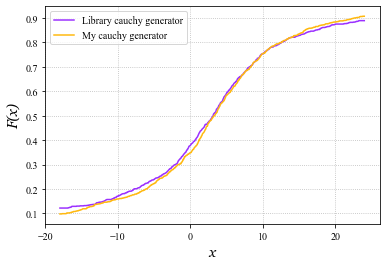

In [193]:
plt.plot(t, Y_check, color = '#9B30FF')
plt.plot(t, Y, color = '#FFB90F')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.xlabel("x", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("F(x)", fontname = "Georgia", style = "italic", fontsize = 14)
plt.legend(['Library cauchy generator', 'My cauchy generator'], loc = 'best', fontsize = 10)
plt.savefig("14.pdf")
plt.show()

<font color=#7A378B>  2. Метод фон Неймана моделирования случайной величины позволяет построить датчик для нужного нам распределения на основе уже имеющегося генератора, сделанного для другого распределения. <font>

<font color=#7A378B>  Пусть имеется некоторое простраство $(E , \mathcal{E})$, на котором заданы вероятностные меры $P$ и $Q$, такие, что $P < k \cdot Q$, где $k$ — некоторое вещественное число, т.е:
$$\forall A \in \mathcal{E} \Rightarrow P(A) < k \cdot Q(A).$$ <font>

<font color=#7A378B> Построим датчик для стандартного нормального распределения на основе распределения Коши с параметрами $a = 0,\ b = 1$ по методу фон Неймана: <font>
    
<font color=#7A378B>  
    
- Генерируем независимые пары случайных величин $\left(X_i, \nu_i\right)$, где $X_i$ имеет распределение Коши с параметрами $a = 0,\ b = 1$, а $\nu_i-$ распределение Бернулли с вероятностью успеха:
$$P\left(\nu_i, X_i=x\right)=\frac{1}{k}\sqrt{\frac{\pi}{2}} e^{-\frac{x^2}{2}}\left(x^2+1\right)=\frac{\left(x^2+1\right)}{2} e^{-\frac{x^2}{2}+\frac{1}{2}},\ k = \frac{\sqrt{2\pi}}{\sqrt{e}}$$
- Оставляем только те пары, где $\nu_i = 1$.
Последовательность из оставшихся $X_i$ будет иметь стандартное нормальное распределение. <font>

In [194]:
def john_von_neumann(n):
    i = 0
    a = 0
    b = 1
    res = np.zeros(n)
    while i < n:
        X = cauchy(a, b, 1)
        p = (X**2 + 1)/2 * np.exp(0.5 * (1 - X**2))
        nu = bernoulli(p, 1)
        if nu == 1:
            res[i] = X
            i += 1
    return res

In [195]:
# Значения параметров
n = 2000

In [198]:
X = john_von_neumann(n)
t = np.linspace(-3, 3, n) # Правило трёх сигм
Y = [(X < i).sum()/n for i in t]

X_check = np.random.normal(0, 1, n)
Y_check = [(X_check < i).sum()/n for i in t]

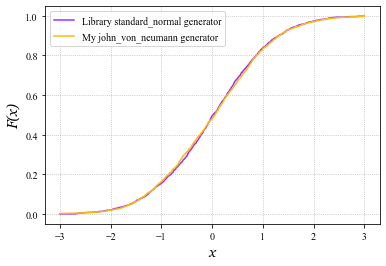

In [199]:
plt.plot(t, Y_check, color = '#9B30FF')
plt.plot(t, Y, color = '#FFB90F')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.xlabel("x", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("F(x)", fontname = "Georgia", style = "italic", fontsize = 14)
plt.grid(True)
plt.legend(['Library standard_normal generator', 'My john_von_neumann generator'], loc = 'best', fontsize = 10)
plt.savefig("15.pdf")
plt.show()

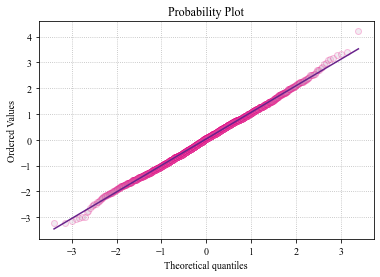

In [200]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(X, plot = plt)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.get_lines()[0].set_markerfacecolor('#CDB5CD')
ax.get_lines()[0].set_markeredgecolor('#EE1289')
ax.get_lines()[0].set_alpha(0.25)
ax.get_lines()[1].set_color('#68228B')
fig.savefig("16.pdf")
plt.show()

In [202]:
# Значения параметров
n = 2000
a = 10
b = 1

In [203]:
X = john_von_neumann(n)

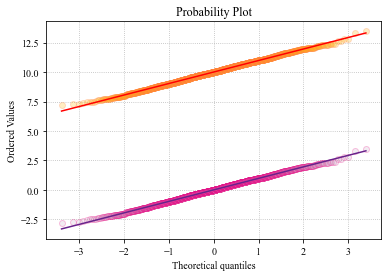

In [204]:
# Влияние параметра сдвига
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(X, plot = plt)
res_1 = stats.probplot(X + a, plot = plt)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.get_lines()[0].set_markerfacecolor('#CDB5CD')
ax.get_lines()[0].set_markeredgecolor('#EE1289')
ax.get_lines()[0].set_alpha(0.25)
ax.get_lines()[1].set_color('#68228B')
ax.get_lines()[2].set_markerfacecolor('#FFB90F')
ax.get_lines()[2].set_markeredgecolor('#FF8247')
ax.get_lines()[2].set_alpha(0.25)
fig.savefig("17.pdf")
plt.show()

In [205]:
# Значения параметров
n = 2000
a = 0
b = 8

In [206]:
X = john_von_neumann(n)

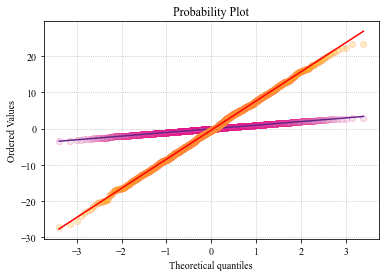

In [207]:
# Влияние параметра масштаба
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(X, plot = plt)
res_1 = stats.probplot(b * X, plot = plt)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
ax.get_lines()[0].set_markerfacecolor('#CDB5CD')
ax.get_lines()[0].set_markeredgecolor('#EE1289')
ax.get_lines()[0].set_alpha(0.25)
ax.get_lines()[1].set_color('#68228B')
ax.get_lines()[2].set_markerfacecolor('#FFB90F')
ax.get_lines()[2].set_markeredgecolor('#FF8247')
ax.get_lines()[2].set_alpha(0.25)
fig.savefig("18.pdf")
plt.show()

<font color=#7A378B> 3. Сравниваем скорость моделирования стандартного нормального распределения в заданиях 3 и 4: <font>

In [208]:
from time import time

100%|██████████| 800/800 [00:00<00:00, 1347.51it/s]


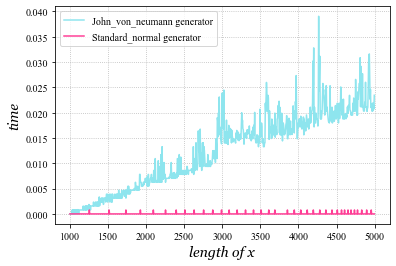

In [210]:
n = np.arange(1000, 5000, 5)
times_1 = np.zeros(n.size)
for i in tqdm(range(n.size)):
    arr = np.zeros(20)
    for j in range(20):
        time1 = time()
        john_von_neumann(i)
        arr[j] = time() - time1
    times_1[i] = arr.mean()
plt.plot(n, times_1, color = '#8EE5EE');

times_2 = np.zeros(n.size)
for i in tqdm(range(n.size)):
    arr = np.zeros(20)
    for j in range(20):
        time1 = time()
        standard_normal(i)
        arr[j] = time() - time1
    times_2[i] = arr.mean()
plt.plot(n, times_2, color = '#FF3E96');
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.xlabel("length of x", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("time", fontname = "Georgia", style = "italic", fontsize = 14)
plt.grid(True)
plt.legend(['John_von_neumann generator', 'Standard_normal generator'], loc = 'best', fontsize = 10)
plt.savefig("19.pdf")
plt.show()

<font color=#7A378B> Метод Бокса-Мюллера работает быстрее метода фон Неймана. <font>

## Задание № 5

1. Пусть $X_i \sim \mathcal{N}(\mu,\ \sigma^2)$. Убедиться эмпирически в справедливости ЗБЧ и ЦПТ, т.е. исследовать поведение суммы $S_n$ и эмпирического распределения величины;
$$\sqrt{n}\left(\frac{S_n}{n} - a\right)$$ 
2. Считая $\mu$ и $\sigma^2$ неизвестными, для пункта 1 построить доверительные интервалы для среднего и дисперсии.
3. Пусть $X_i \sim \mathcal{K}(a,\ b)$ имеет распределение Коши со сдвигом $a$ и масштабом $b$. Проверить эмпирически, как ведут себя суммы $\frac{S_n}{n}$. Результат объяснить, а также найти закон распределения данных сумм.

<font color=#7A378B> 1. __Закон больших чисел в форме Чебышёва__ <font>

<font color=#7A378B> Пусть $X_1,\ X_2, \ldots$ - последовательность независимых одинаково распределенных случайных величин с $\mathbb{E} X_k=a$ и $\mathbb{Var} X_k<\infty$.
Тогда, если обозначить $S_n=X_1+\ldots+X_n$, то выполнен ЗБЧ:
$$\frac{S_n-\mathbb{E} S_n}{n} \xrightarrow[n \rightarrow \infty]{\mathbb{Р}} 0,$$ что равносильно:
$$\frac{S_n}{n} \xrightarrow[n \rightarrow \infty]{\mathbb{Р}} a$$ <font>

In [27]:
# Значения параметров
n = 1000
mu = 3
sigma = 9

In [28]:
X = np.random.normal(mu, sigma, n)
S_n = np.cumsum(X)
arr_n = np.arange(1, n + 1)
Y = S_n / arr_n

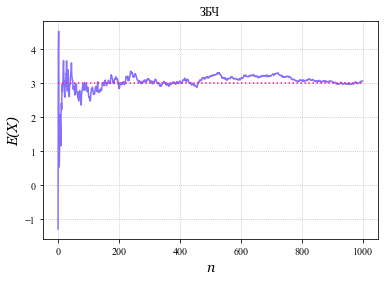

In [29]:
plt.plot(Y, color = '#8470FF')
plt.plot(mu*np.ones(n), ':', color = '#FF1493')
plt.title('ЗБЧ')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.xlabel("n", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("E(X)", fontname = "Georgia", style = "italic", fontsize = 14)
plt.grid(True)
plt.savefig("20.pdf")
plt.show()

In [30]:
X = np.random.normal(mu, sigma, n * n).reshape(n, n)
X_new = np.sqrt(n)*(X.mean(axis = 0) - mu)
t = np.linspace(mu - 3 * sigma, mu + 3 * sigma, n)
Y_new = [(X_new < i).sum()/n for i in t]
X_rnd = np.random.normal(0, sigma, n)
Y_rnd = [(X_rnd < i).sum()/n for i in t]

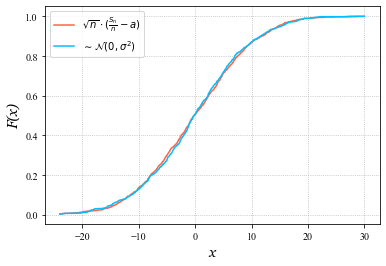

In [31]:
plt.plot(t, Y_new, color = '#FF6347')
plt.plot(t, Y_rnd, color = '#00BFFF')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.xlabel("x", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("F(x)", fontname = "Georgia", style = "italic", fontsize = 14)
plt.grid(True)
plt.legend([r'$\sqrt{n}\cdot(\frac{S_n}{n}-a)$', '$\sim \mathcal{N}(0, \sigma^2)$'], loc = 'best', fontsize = 10)
plt.savefig("21.pdf")
plt.show()

<font color=#7A378B> 2. Пусть задано малое число $0 < \alpha < 1$. Интервал со случайными концами $(\theta_1; \theta_2)$
называется доверительным интервалом для параметра $\theta$ с уровнем доверия $\alpha$, если для любого $\theta \in \Theta$
$$\mathbb{P}\left(\theta_1 < \theta < \theta_2 \right) \geqslant \alpha$$ <font>

<font color=#7A378B> Пусть $t_{\alpha,\ n-1}-\alpha$-квантили распределения Стьюдента. Тогда :
$$\mathbb{P}\left(t_{\frac{1-\alpha}{2},\ n-1} \leq t \leq t_{\frac{1+\alpha}{2},\ n-1}\right)=\alpha.$$
После подстановки выражения для $t$-статистики, получим
$$\mathbb{P}\left(\bar{X}-t_{\frac{1+\alpha}{2},\ n-1} \frac{s}{\sqrt{n}} \leqslant \mu \leq \bar{X}+t_{\frac{1+\alpha}{2},\ n-1} \frac{s}{\sqrt{n}}\right)=\alpha.$$ <font>
    
<font color=#7A378B>  Таким образом, мы получили доверительный интервал для параметра $\mu$ стандартного нормального распределения:
$$\bar{X}-t_{\frac{1+\alpha}{2},\ n-1} \frac{s}{\sqrt{n}} \leqslant \mu \leqslant \bar{X}+t_{\frac{1+\alpha}{2},\ n-1} \frac{s}{\sqrt{n}}$$
$s - $ несмещенное выборочное стандартное отклонение <font>

<font color=#7A378B> __Теорема Фишера__ для нормальных выборок: cлучайная величина $H=\frac{(n-1) s^2}{\sigma^2}$ имеет распределение $\mathcal{X}_{n-1}^2$.
Тогда:
$$\mathbb{P}\left(\mathcal{X}_{\frac{1-\alpha}{2}, n-1}^2 \leq H \leq \mathcal{X}_{\frac{1+\alpha}{2}, n-1}^2\right)= \alpha$$
После подстановки выражения для $H$, получим:
$$\mathbb{P}\left(\frac{(n-1) s^2}{\mathcal{X}_{\frac{1-\alpha}{2}, n-1}^2} \leq \sigma^2 \leq \frac{(n-1) s^2}{\mathcal{X}_{\frac{1+\alpha}{2}, n-1}^2}\right)=\alpha$$
Таким образом, доверительный интервал для параметра $\sigma^2$ стандартного нормального распределения:
$$\frac{(n-1) s^2}{\mathcal{X}_{\frac{1-\alpha}{2}, n-1}^2} \leq \sigma^2 \leq \frac{(n-1) s^2}{\mathcal{X}_{\frac{1+\alpha}{2}, n-1}^2}.$$ <font>

In [47]:
# Значения параметров
alpha = 0.95
mu = 5
sigma = 3
n = 1000

In [48]:
X = np.random.normal(mu, sigma, n)
S_n = np.cumsum(X) # np.array([X1, X1+X2, X1+X2+X3, ..., X1+...+Xn])
arr_n = np.arange(1, n + 1)
X_mean = S_n / arr_n
s = np.sqrt(np.cumsum((X - X_mean[-1])**2)/(n - 1))
t = stats.t.ppf((alpha + 1)/2, n - 1)
mu_1 = X_mean - t*s/np.sqrt(n)
mu_2 = X_mean + t*s/np.sqrt(n)
x = np.concatenate((arr_n, np.flip(arr_n)))
y = np.concatenate((mu_2, np.flip(mu_1)))
print('{} < mu = {} < {}'.format(mu_1[-1], mu, mu_2[-1]))

4.789385622834607 < mu = 5 < 5.167903417314773


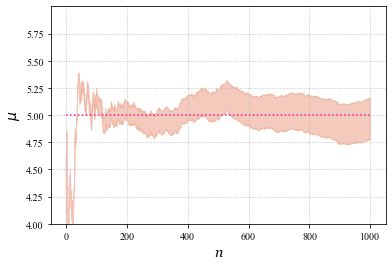

In [38]:
plt.plot(mu * np.ones(n), ':', color = '#FF1493')
plt.fill(x, y, color = '#E9967A', alpha = 0.5)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.xlabel("n", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("$\mu$", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylim(mu - 1, mu + 1)
plt.yticks(np.arange(mu - 1, mu + 1, 0.25))
plt.show()

In [46]:
chi1 = stats.chi2.ppf((1 - alpha)/2, n - 1)
chi2 = stats.chi2.ppf((1 + alpha)/2, n - 1)
sigma_2 = np.sqrt((n - 1) * (s**2) / chi1)
sigma_1 = np.sqrt((n - 1) * (s**2) / chi2)
x = np.concatenate((arr_n, np.flip(arr_n)))
y = np.concatenate((sigma_1, np.flip(sigma_2)))
print('{} < sigma = {} < {}'.format(sigma_1[-1], sigma, sigma_2[-1]))

2.9429089865208087 < sigma = 3 < 3.2127838036601357


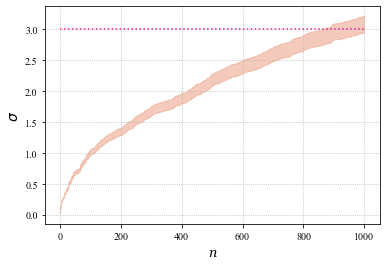

In [44]:
plt.plot(sigma * np.ones(n), ':', color = '#FF1493')
plt.fill(x, y, color = '#E9967A', alpha = 0.5)
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.xlabel("n", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("$\sigma$", fontname = "Georgia", style = "italic", fontsize = 14)
plt.show()

<font color=#7A378B> 3. Пусть $X_i \sim \mathcal{K}(a,\ b)$ имеет распределение Коши со сдвигом $a$ и масштабом $b$. Проверим эмпирически, как ведут себя суммы $\frac{S_n}{n}$ <font>

In [49]:
# Значения параметров
a = 0
b = 3
n = 10000

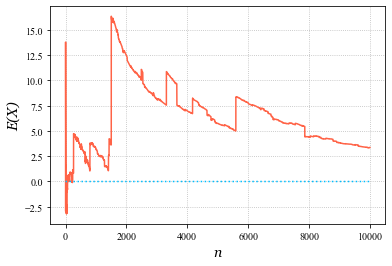

In [51]:
X =  a + b * np.random.standard_cauchy(n)
arr_n = np.arange(1, n + 1)
S_n = np.cumsum(X)
Y = S_n / arr_n
plt.plot(arr_n, Y, "-", color = '#FF6347')
plt.plot(a * np.ones(n), ':', color = '#00BFFF')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.grid(True)
plt.xlabel("n", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("E(X)", fontname = "Georgia", style = "italic", fontsize = 14)
plt.savefig("22.pdf")
plt.show()

<font color=#7A378B> __Вывод__: иллюстрация говорит о неприменимости ЗБЧ к распределению Коши. <font>

In [52]:
X = cauchy(a, b, n * n).reshape(n, n)
X = X.mean(axis = 0)
t = np.linspace(a - 3 * b, a + 3 * b, n)
Y = [(X < i).sum()/n for i in t]

X_rnd = a + b * np.random.standard_cauchy(n)
Y_rnd = [(X_rnd < i).sum()/n for i in t]

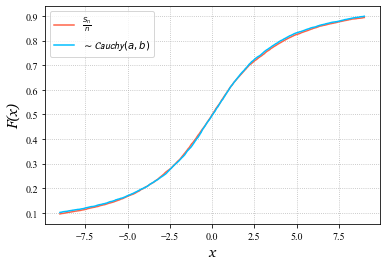

In [53]:
plt.plot(t, Y, color = '#FF6347')
plt.plot(t, Y_rnd, color = '#00BFFF')
plt.rc('grid', linestyle = ":", color = '#B5B5B5')
plt.xlabel("x", fontname = "Georgia", style = "italic", fontsize = 14)
plt.ylabel("F(x)", fontname = "Georgia", style = "italic", fontsize = 14)
plt.grid(True)
plt.legend([r'$\frac{S_n}{n}$', '$\sim \mathcal{Cauchy}(a, b)$'], loc = 'best', fontsize = 10)
plt.savefig("23.pdf")
plt.show()

<font color=#7A378B> __Вывод__: распределение Коши обладает свойством устойчивости. <font>

## Задание № 6

1. Посчитать интеграл
$$\int\limits_{-\infty}^{\infty} \int\limits_{-\infty}^{\infty} \ldots \int\limits_{-\infty}^{\infty} \frac{e^{-\left(x_1^2+\ldots+x_{10}^2+\frac{1}{2^7 \cdot x_1^2 \cdots \cdot x_{10}^2}\right)}}{x_1^2 \cdot \ldots \cdot x_{10}^2} d x_1 d x_2 \ldots d x_{10}$$
- методом Монте-Карло
- методом квадратур, сводя задачу к вычислению собственного интеграла Римана
2. Для каждого случая оценить точность вычислений.

<font color=#7A378B> $\rho(x)-$ плотность совместного распределения случайного вектора с $10$-ю компонентами, имеющим нормальное распределение с параметрами $\mu=0, \sigma^2=\frac{1}{2}$ :
$$ \rho(x)=\pi^{-5} e^{-\left(x_1^2+\ldots+x_{10}^2\right)}$$
$$g(x)=\pi^5 \frac{e^{-\frac{1}{2^7 \cdot x_1^2 \ldots \cdot x_{10}^2}}}{x_1^2 \cdot \ldots \cdot x_{10}^2}$$ <font>

In [ ]:
# Значения параметров
n = 100000
count = 10
epsilon = 1e-10
alpha = 0.99

In [ ]:
def Monte_Carlo(x, epsilon):
    mul = np.prod(x**2, axis = 1)
    res = np.zeros(mul.shape)
    res[mul >= epsilon] = (np.pi)**5 * np.exp(-1/(2**7 * mul[mul >= epsilon]))/mul[mul >= epsilon]
    return res

In [ ]:
X = np.random.normal(0, np.sqrt(0.5), count * n).reshape(n, count)
g = Monte_Carlo(X, epsilon)
res = g.mean()
sigma = np.sqrt(np.sum((g - res)**2)/(n - 1))
K = stats.norm.ppf(1-alpha/2)
eps = sigma/np.sqrt(n) * K
print("Значение интерграла:", res)
print("Погрешность:", eps)

Значение интерграла: 124.0220615848674
Погрешность: 0.04524826105723924


<font color=#7A378B> Для вычисления методом квадратур сделаем замену $x_i=\tan\left(\frac{\pi}{2} t_i\right), d x_i=\frac{\pi}{2} \frac{1}{\cos ^2\left(\frac{\pi}{2} t_i\right)},-1 \leq t_i \leq 1, \forall i=\overline{1,10}$ и, с учетом симметричности, получим новое представление искомого интеграла:
$$I=\pi^{10} \int_0^1 \ldots \int_0^1 \frac{e^{-\left(\sum\limits_{i=1}^{10} \tan^2\left(\frac{\pi}{2} t_i\right)+\frac{1}{2^7 \prod\limits_{i=1}^{10} \tan^2\left(\frac{\pi}{2} t_i\right)}\right)}}{\prod\limits_{i=1}^{10}\left(\tan^2\left(\frac{\pi}{2} t_i\right) \cos ^2\left(\frac{\pi}{2} t_i\right)\right)} d t_1 \ldots d t_{10}$$ <font>

In [2]:
import itertools

In [3]:
# Значения параметров
n = 8
h = np.pi/n

In [4]:
def the_quadrature_method(x):
    res = 0
    for i in tqdm(range(len(x))):
        tan_prod = np.prod((np.tan(x[i]))**2)
        cos_prod = np.prod((np.cos(x[i]))**2)
        res += np.exp(-(np.sum((np.tan(x[i]))**2)+ 1/(128*tan_prod)))/tan_prod/cos_prod
    return res

In [5]:
x = np.arange(0 + h/2, 1 + h/2, h/2)
y = list(itertools.product(x, repeat = 10))

I = the_quadrature_method(y)*(np.pi/n)**10
print('Значение интерграла:', I)

100%|██████████| 60466176/60466176 [35:26<00:00, 28435.56it/s]

Значение интерграла: 122.71109951467847
